# Compare theory predictions using Nyx / Gadget emulators

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140

In [2]:
# our modules
from lace.data import data_MPGADGET
from lace.emulator import gp_emulator
from lace.emulator import p1d_archive
from lace.likelihood import full_theory

### Setup mock data from central Gadget sim

In [3]:
# specify simulation suite and P1D mesurements
basedir="lace/emulator/sim_suites/Australia20/"
skewers_label='Ns500_wM0.05'
p1d_label=None
z_min=2.95
z_max=3.55
data=data_MPGADGET.P1D_MPGADGET(basedir=basedir,
                                skewers_label=skewers_label,
                                sim_label="central",
                                zmin=z_min,zmax=z_max)
print('mock data will have only z =',data.z)

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = -5.5511E-17, Omega_nu h^2 = 0.0000E+00, A_s = 2.0061E-09, n_s = 9.6757E-01, alpha_s = 0.0000E+00
mock data will have only z = [3.   3.25 3.5 ]


3.0
3.25
3.5


(0.005, 0.6)

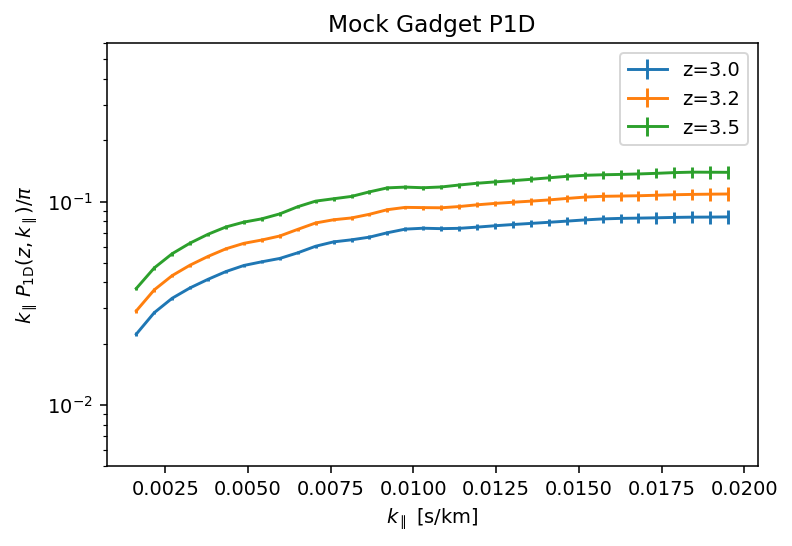

In [4]:
k_kms=data.k
for iz,z in enumerate(data.z):
    print(z)
    Pk_kms=data.get_Pk_iz(iz)
    cov_kms=data.get_cov_iz(iz)
    plt.errorbar(k_kms,Pk_kms*k_kms/np.pi,yerr=np.sqrt(np.diag(cov_kms))*k_kms/np.pi,label='z=%.1f'%z)
        
plt.yscale('log')
plt.legend()
plt.xlabel(r'$k_\parallel$ [s/km]')
plt.ylabel(r'$k_\parallel \, P_{\rm 1D}(z,k_\parallel) / \pi$')
plt.title('Mock Gadget P1D')
plt.ylim(0.005,0.6)

### Setup archive and emulator parameters from Gadget sims

In [5]:
# let's use the same pivot point for both
kp_Mpc=0.7

In [6]:
gadget={'label':'Gadget'}
# archive of simulated P1D measurements
gadget['archive']=p1d_archive.archiveP1D(basedir=basedir,skewers_label=skewers_label,
                            drop_tau_rescalings=True,z_max=4.0,kp_Mpc=kp_Mpc)
# specify parameters to be used in emulator
gadget['paramList']=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
# specify k range
gadget['kmax_Mpc']=8

### Setup archive and emulator parameters from Nyx sims

In [7]:
from lace.emulator import p1d_archive_Nyx

nyx={'label':'Nyx'}
# archive of simulated P1D measurements
nyx['archive']=p1d_archive_Nyx.archiveP1D_Nyx(fname=None,kp_Mpc=kp_Mpc,verbose=False)
# specify parameters to be used in emulator
nyx['paramList']=['mF', 'sigT_Mpc', 'gamma', 'Delta2_p', 'n_p']
# specify k range
nyx['kmax_Mpc']=2

### Setup both emulators and theories

In [8]:
for suite in [gadget,nyx]:
    suite['emulator']=gp_emulator.GPEmulator(paramList=suite['paramList'],
                                passarchive=suite['archive'],
                                kmax_Mpc=suite['kmax_Mpc'],
                                train=True)

 /Users/font/opt/anaconda3/envs/lya_cosmo/lib/python3.8/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 270 points
Optimised
Training GP on 100 points
Optimised


In [9]:
for suite in [gadget,nyx]:
    suite['theory']=full_theory.FullTheory(zs=data.z,emulator=suite['emulator'],verbose=False)
    suite['prediction']=suite['theory'].get_p1d_kms(k_kms=k_kms,like_params=[],
                                                    return_covar=True,return_blob=False)

 /Users/font/opt/anaconda3/envs/lya_cosmo/lib/python3.8/site-packages/lace-1.0.1-py3.8.egg/lace/likelihood/full_theory.py:382: UserWarning:Matplotlib is currently using pdf, which is a non-GUI backend, so cannot show the figure.
 <ipython-input-10-55116ba68c0a>:5: UserWarning:Matplotlib is currently using pdf, which is a non-GUI backend, so cannot show the figure.
 /Users/font/opt/anaconda3/envs/lya_cosmo/lib/python3.8/site-packages/lace-1.0.1-py3.8.egg/lace/likelihood/full_theory.py:382: UserWarning:Matplotlib is currently using pdf, which is a non-GUI backend, so cannot show the figure.
 <ipython-input-10-55116ba68c0a>:5: UserWarning:Matplotlib is currently using pdf, which is a non-GUI backend, so cannot show the figure.


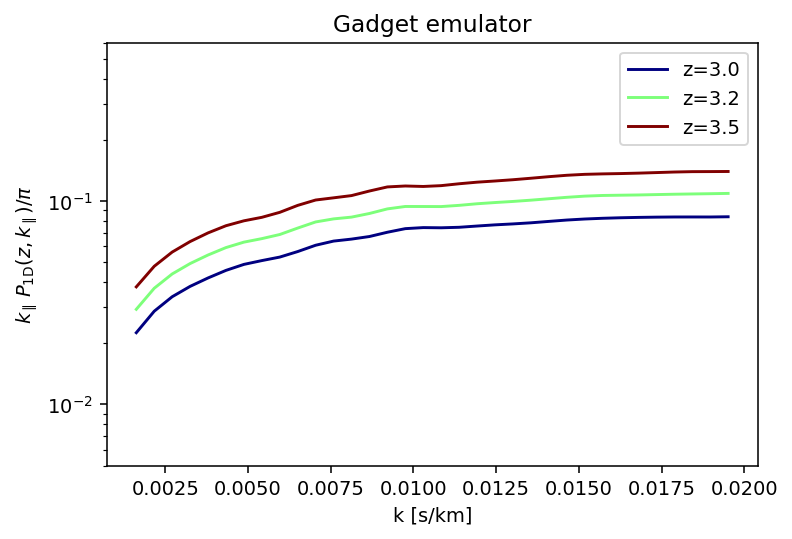

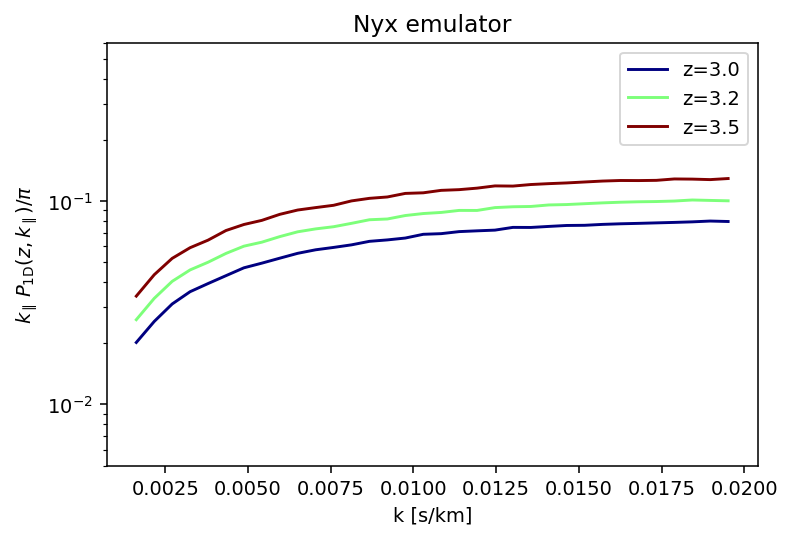

In [10]:
for suite in [gadget,nyx]:
    plt.figure()
    plt.title('{} emulator'.format(suite['label']))
    suite['theory'].plot_p1d(k_kms,like_params=[])
    plt.show()

 /Users/font/opt/anaconda3/envs/lya_cosmo/lib/python3.8/site-packages/lace-1.0.1-py3.8.egg/lace/likelihood/full_theory.py:382: UserWarning:Matplotlib is currently using pdf, which is a non-GUI backend, so cannot show the figure.


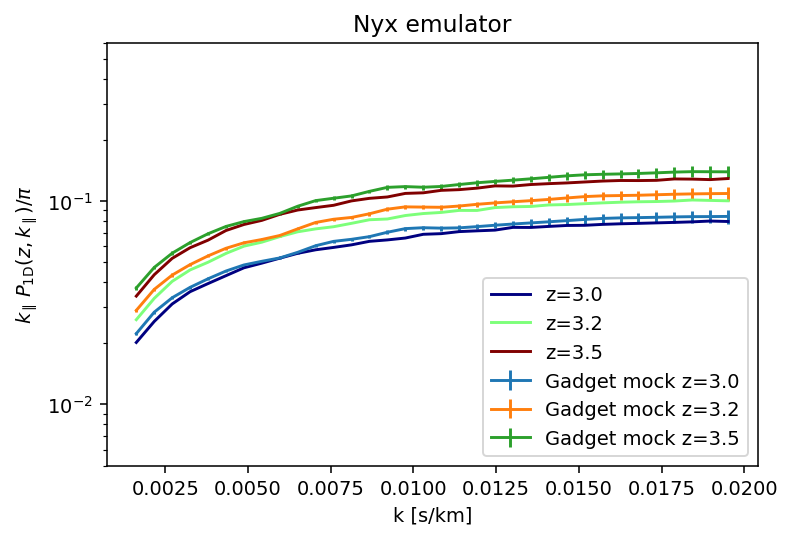

In [11]:
for iz,z in enumerate(data.z):
    Pk_kms=data.get_Pk_iz(iz)
    cov_kms=data.get_cov_iz(iz)
    plt.errorbar(k_kms,Pk_kms*k_kms/np.pi,yerr=np.sqrt(np.diag(cov_kms))*k_kms/np.pi,label='Gadget mock z=%.1f'%z)
for suite in [nyx]:
    #plt.figure()
    plt.title('{} emulator'.format(suite['label']))
    suite['theory'].plot_p1d(k_kms,like_params=[])
#    plt.show()